In [163]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Support Vector Machines (SVM)

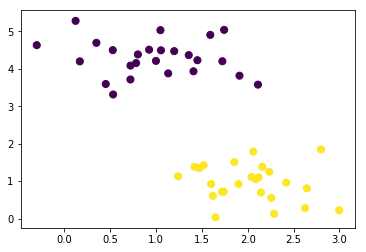

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.5)
plt.scatter(X[:,0], X[:, 1], c=y, s=50)

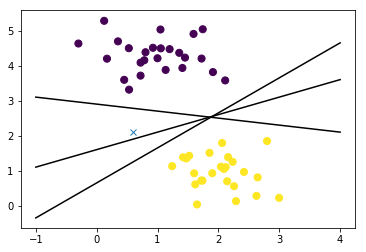

In [3]:
xfit = np.linspace(-1, 4)
plt.scatter(X[:,0], X[:, 1], c=y, s=50)
plt.plot([0.6], [2.1], 'x')
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

### Maximizing the Margin

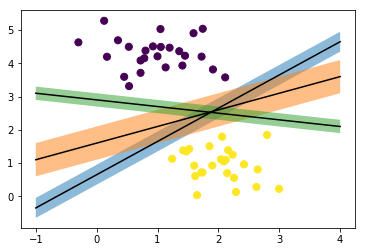

In [8]:
xfit = np.linspace(-1, 4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
for m, b, d in [(1, 0.65, 0.3), (0.5, 1.6, 0.5), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, alpha=0.5)

# Support Vector Classifier (SVC)

In [12]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)
print(model)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[[0.5323772  3.31338909]
 [2.11114739 3.57660449]
 [2.06051753 1.79059891]]


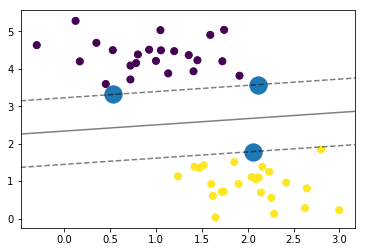

In [46]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300)
        
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(model)
print(model.support_vectors_)

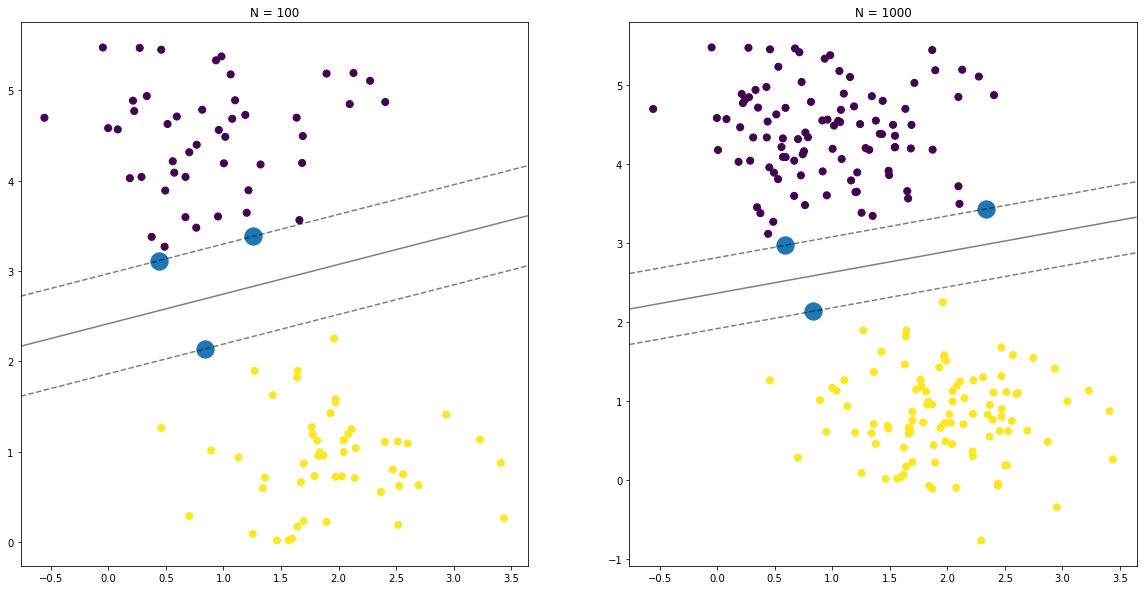

In [61]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for axi, N in zip(ax, [100, 1000]):
    plot_svm(N, axi)
    axi.set_title('N = %d' % (N))

# Kernel Support Vector Machines (Kernel SVM)

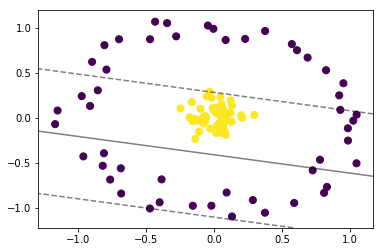

In [57]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf, plot_support=False)

### Radical Basis Function

In [80]:
r = np.exp(-(X ** 2).sum(1))
print(r)

[0.97069185 0.39610815 0.99450814 0.99389712 0.25784273 0.98550696
 0.97374316 0.36652626 0.99308291 0.9914098  0.2571666  0.97457548
 0.99640876 0.43697592 0.96777732 0.42640782 0.98657446 0.30237491
 0.91854649 0.39043123 0.5383571  0.34055895 0.41907477 0.49617097
 0.97905149 0.95971791 0.43727753 0.46815558 0.35419859 0.37220953
 0.99169698 0.99192277 0.95756436 0.30764213 0.27696306 0.37427644
 0.96441293 0.28857491 0.99276674 0.92850688 0.29402428 0.34873606
 0.99713987 0.98883792 0.44296064 0.32881627 0.98148502 0.41734208
 0.98476238 0.29127569 0.9710582  0.26304485 0.34736706 0.38194898
 0.39946922 0.35141928 0.28456772 0.36442273 0.94255107 0.34690195
 0.97150524 0.95802492 0.37311034 0.98819335 0.43799938 0.95006398
 0.262773   0.99287743 0.98225178 0.99674673 0.96458433 0.94408387
 0.34705397 0.98715329 0.37395918 0.99023701 0.94522094 0.94885612
 0.28445116 0.27078034 0.99568461 0.33137185 0.99512482 0.97991505
 0.40130905 0.40606678 0.99623254 0.39817123 0.93037875 0.9741

### Kernel Transformation

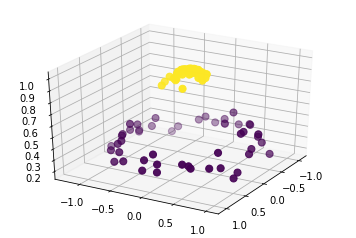

In [107]:
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50)
    ax.view_init(elev=elev, azim=azim)
plot_3D()

### Radial Basis Function (RBF)

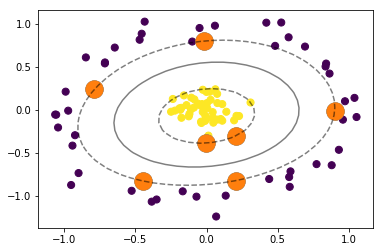

In [115]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1)

# Softening Margins

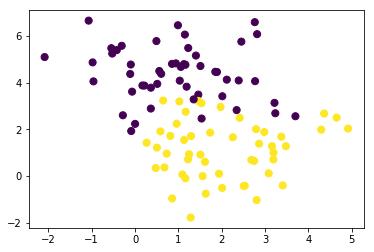

In [117]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

### Fudge Factor

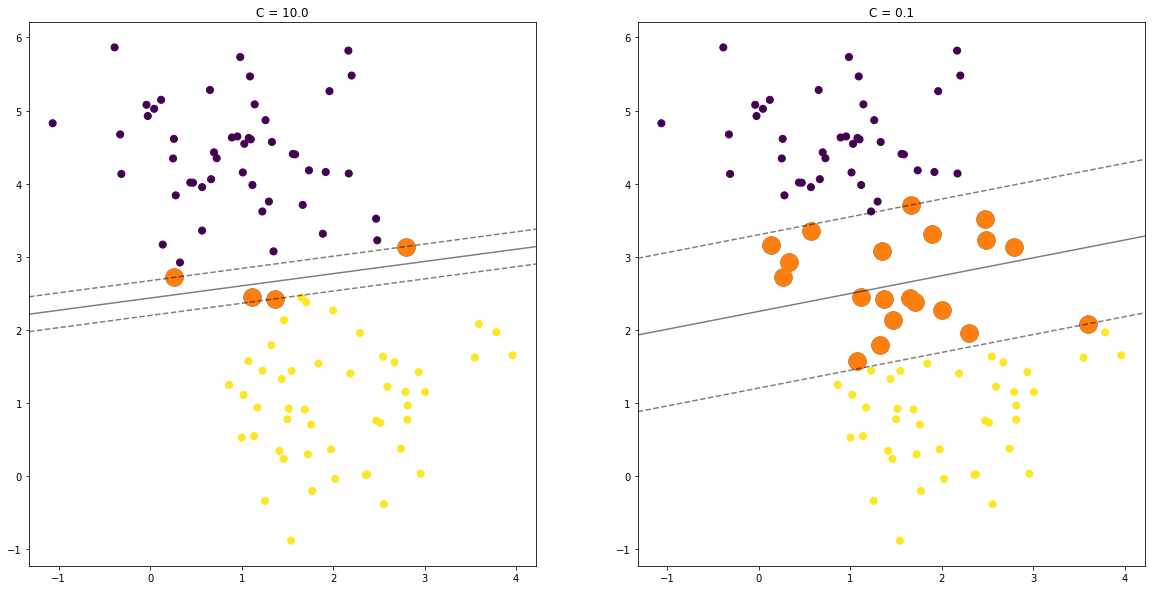

In [122]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for axi, C in zip(ax, [10, 0.1]):
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50)
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1)
    axi.set_title('C = %0.1f' % (C))

# Example: Facial Recognition

In [125]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=100)
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


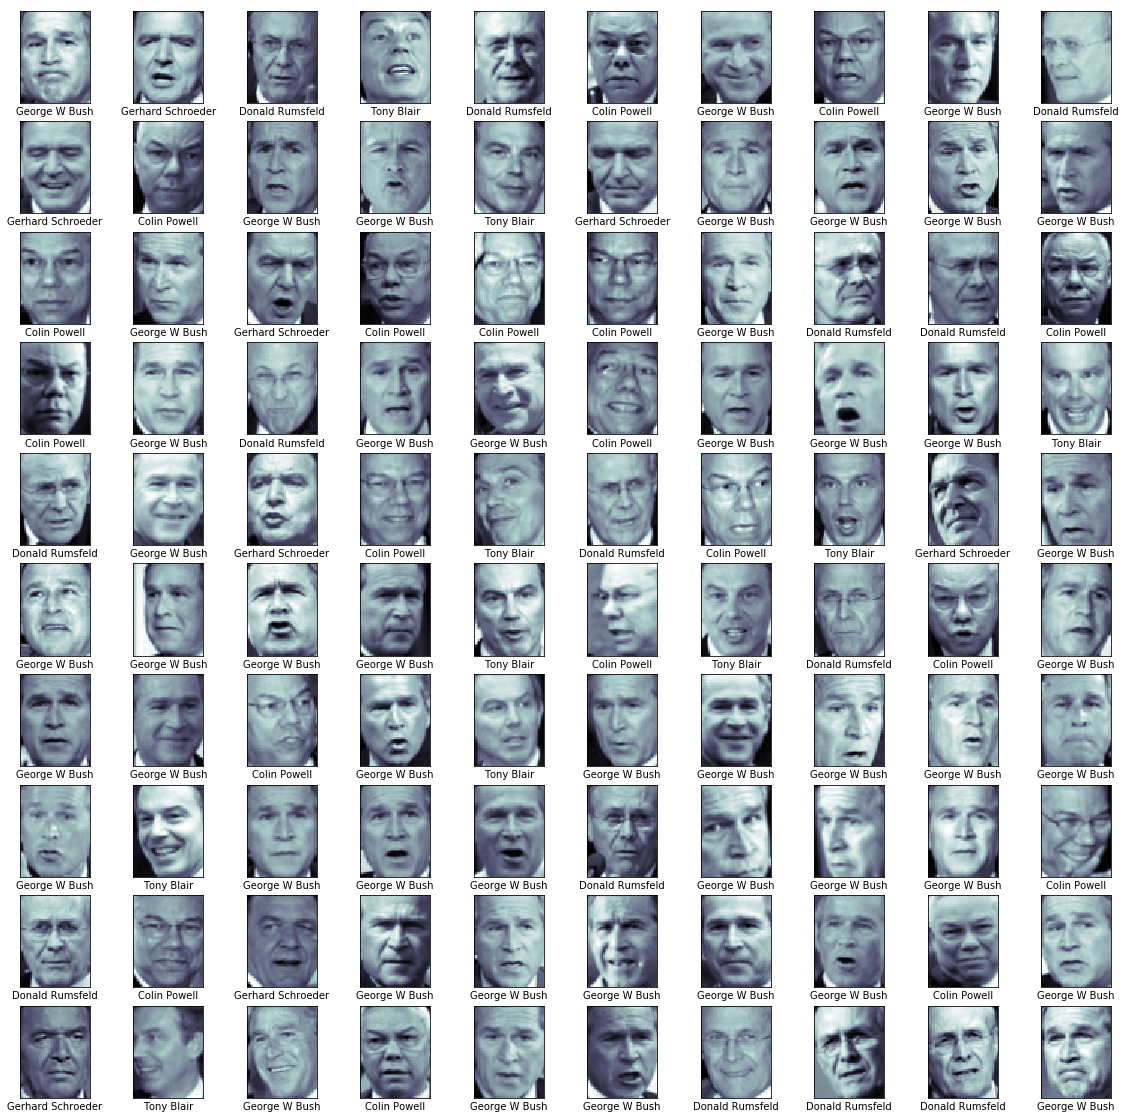

In [133]:
fig, ax = plt.subplots(10, 10, figsize=(20, 20))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [135]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [140]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(855, 2914)
(285, 2914)
(855,)
(285,)


In [141]:
from sklearn.grid_search import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 15], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 25.5 s, sys: 1.42 s, total: 27 s
Wall time: 17.8 s
{'svc__gamma': 0.005, 'svc__C': 1}


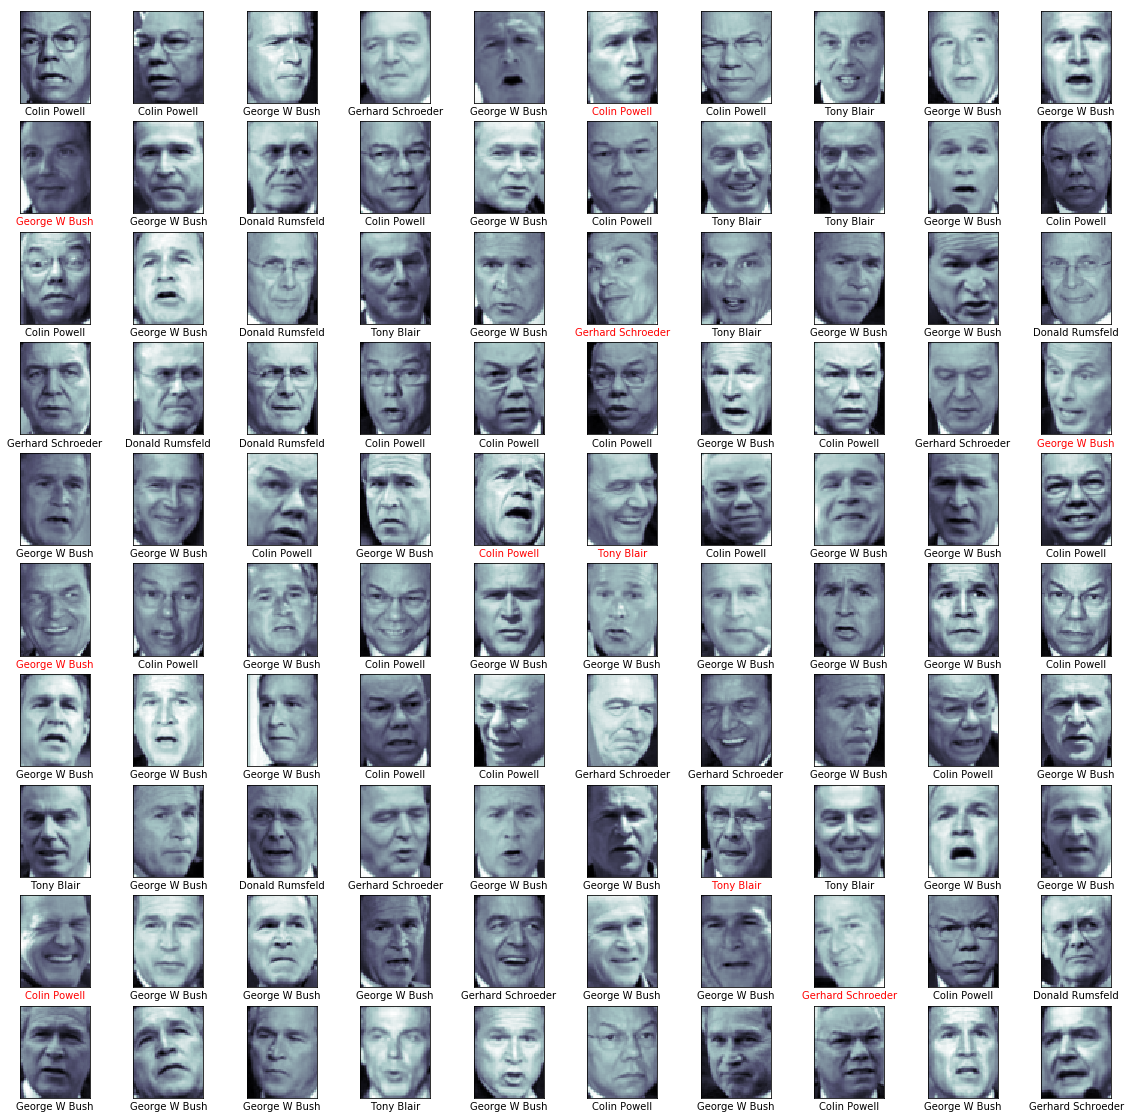

In [161]:
model = grid.best_estimator_
yfit = model.predict(Xtest)
fig, ax = plt.subplots(10, 10, figsize=(20, 20))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(faces.target_names[yfit[i]], color='black' if yfit[i] == ytest[i] else 'red')

### Classification Report

In [162]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.86      0.97      0.91        64
  Donald Rumsfeld       0.93      0.81      0.87        32
    George W Bush       0.94      0.94      0.94       127
Gerhard Schroeder       0.86      0.83      0.84        29
       Tony Blair       0.90      0.82      0.86        33

      avg / total       0.91      0.91      0.91       285



### Confusion Matrix

Text(83.4,0.5,'Predict')

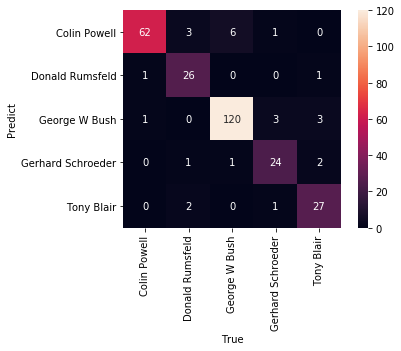

In [167]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('True')
plt.ylabel('Predict')